In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import mu2

from interaction import LocalSystem, potential
import constants as const

plt.style.use('science')
gr = 4/3
h = 3

In [2]:
Rs, gs = np.loadtxt('rgflow_local_lo_a0_fix.txt', unpack=True)

In [3]:
systems = [LocalSystem(Ri) for Ri in tqdm(Rs)]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:08<00:00,  3.78s/it]


In [16]:
nk = 100
# momenta = np.linspace(0.01/const.BETA4, 1/1.5, nk)
momenta = np.linspace(0.01/const.BETA4, 100/const.BETA4, nk)
kcds = np.empty((Rs.size, nk))

for i in tqdm(range(Rs.size)):
    Ri = Rs[i]
    gi = gs[i]
    ls = systems[i]
    kcds[i] = np.array([mu2.cc.cscatter.kcotdelta_py(k, ls.v_tilde + ls.counterterm.gen(gi, 0),
                                                  ls.q, ls.wq, 10*2/Ri, 0, 2*const.MU) for k in momenta])
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:33<00:00,  1.48it/s]


In [17]:
from mottmassey import *

In [18]:
s = LocalSystem(1.5)
vtilde_mm = utility.ft_matrix_gen(mm_potential, 0, 0, s.q, s.r_nodes, s.r_weights)

In [19]:
kcd_mm = np.array([
    mu2.cc.cscatter.kcotdelta_py(k, vtilde_mm, s.q, s.wq, 10*2/s.r_c, 0, 2*const.MU) for k in momenta
])

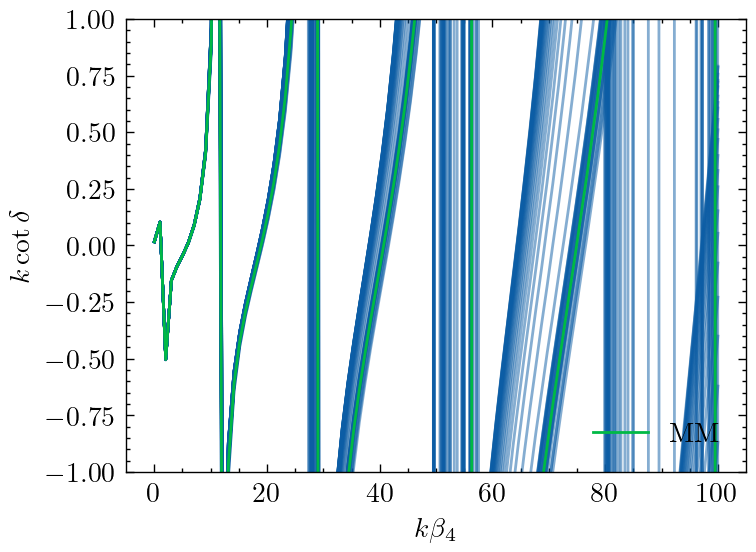

In [20]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for kcd in kcds:
    ax.plot(momenta*const.BETA4, kcd, color='C0', alpha=0.5)

ax.plot(momenta*const.BETA4, kcd_mm, color='C1', label='MM')
# ax.axvline(1/const.BETA4, linestyle='--', color='C6')
ax.set_ylim([-1, 1])
ax.legend()
ax.set_xlabel(r'$k\beta_4$')
ax.set_ylabel(r'$k\cot\delta$');

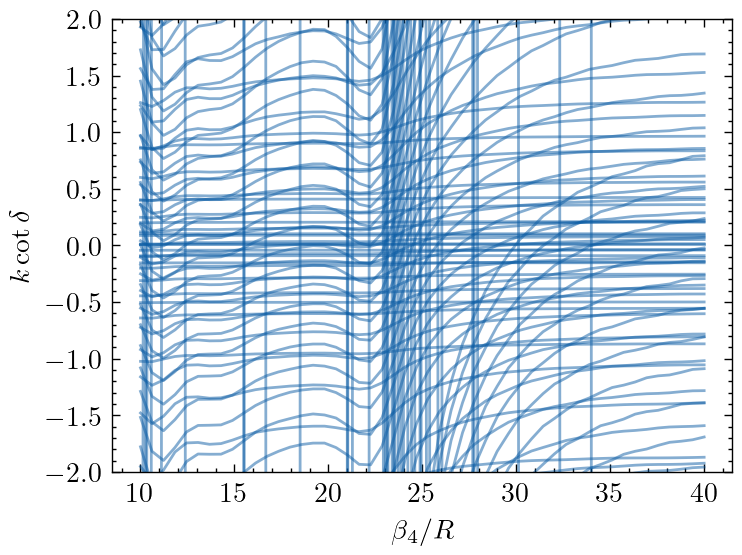

In [21]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for kcd in kcds.T:
    ax.plot(const.BETA4/Rs, kcd, color='C0', alpha=0.5)

# ax.axvline(1/const.BETA4, linestyle='--', color='C6')
ax.set_ylim([-2, 2])

ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$k\cot\delta$');

In [22]:
spectrum_mm = np.loadtxt('spectra_Mott_Massey.txt')
gamma_mm = np.sqrt(-2*const.MU*spectrum_mm)

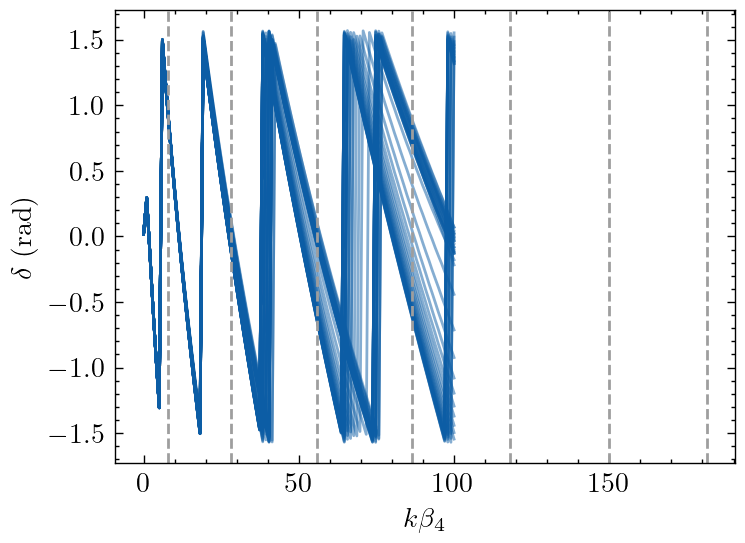

In [23]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for kcd in kcds:
    ax.plot(momenta*const.BETA4, np.arctan(momenta/kcd), color='C0', alpha=0.5)

# ax.axvline(1/const.BETA4, linestyle='--', color='C6')
for gamma in gamma_mm:
    ax.axvline(gamma*const.BETA4, color='C6', linestyle='--')
    
ax.set_xlabel(r'$k\beta_4$')
ax.set_ylabel(r'$\delta$ (rad)');

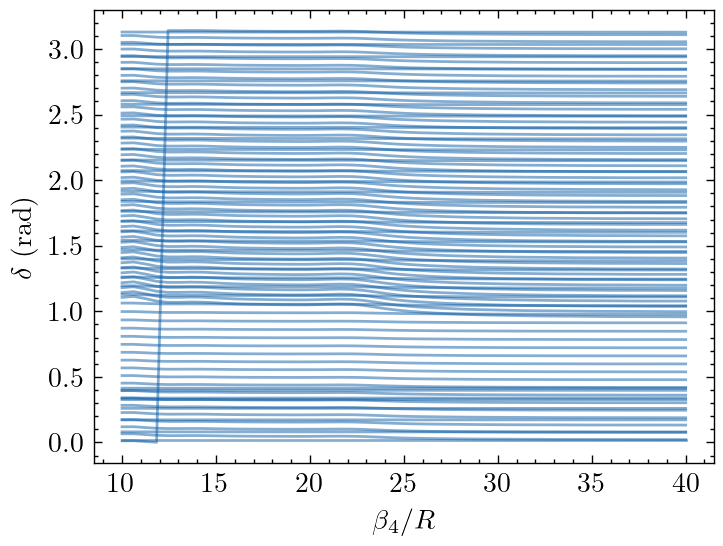

In [11]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for (i, kcd) in enumerate(kcds.T):
    ax.plot(const.BETA4/Rs, (np.arctan(momenta[i]/kcd)+np.pi)%np.pi, color='C0', alpha=0.5)

# ax.axvline(1/const.BETA4, linestyle='--', color='C6')

ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$\delta$ (rad)');